In [1]:
import itertools, os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize,LogNorm
%matplotlib inline
import astropy.io.ascii as at
from astropy import table
from scipy.interpolate import interp1d
from astroquery.simbad import Simbad


In [2]:
poster_figure = (12,7)
talk_figure = (10,6.5)
single_figure = (8,8)
double_figure = (13,6)
double_stacked = (6,13)
triple_stacked = (6,14)
quad_square = (13,10)
proposal_figure = (10,5.5)

std_ms = 9
std_mew = 1.5

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = single_figure
mpl.rcParams['lines.markeredgewidth'] = 1.5
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.direction'] = "in"
# mpl.rcParams[''] = 


# mpl.rcParams['axes.prop_cycle'] = cycler('color',cmap_qual)

In [4]:
model_dir = os.path.expanduser("~/Dropbox/Models/")
cat_dir = os.path.expanduser("~/Dropbox/data/catalogs/")

From Barnes (2003) Section 2

"The principal sources for the cluster rotation periods already available in the literature are as follows: IC 2391: Patten & Simon (1996); IC 2602: Barnes et al. (1999); IC 4665: Allain et al. (1996); Alpha Per: Prosser & Grankin (1997), Prosser et al. (1993); Pleiades: Van Leeuwen et al. (1987), Krishnamurthi et al. (1998); Hyades: Radick et al. (1987); and Coma: Radick, Skiff, & Lockwood (1990). We supplement the information available in the literature with observations in two open clusters, M34 (S. A. Barnes et al. 2003, in preparation) and NGC 3532 (Barnes 1998)....These observations are supplemented by rotation period observations for the Mount Wilson stars, obtained from Baliunas, Sokoloff, & Soon (1996). The vast majority of these are observed periods, but a few have been calculated from activity indices using the prescription of Noyes et al. (1984). " 

The M34 periods were never published, as far as I can tell, and the reference for NGC 3532 is just an abstract in the Journal of the AAVSO - no table that I can find. 

In [5]:
age_norm = LogNorm(vmin=1,vmax=5_000)
mapper = cm.ScalarMappable(norm=age_norm, cmap=cm.plasma_r)


# Set up necessary conversions to stellar mass

In [6]:
kh = at.read(os.path.join(model_dir,"kraushillenbrand5.dat"))
print(kh.dtype)

[('SpT', '<U2'), ('Mu', '<f8'), ('Mg', '<f8'), ('Mr', '<f8'), ('Mi', '<f8'), ('Mz', '<f8'), ('MJ', '<f8'), ('MH', '<f8'), ('MK', '<f8'), ('Mbol', '<f8'), ('Teff', '<i8'), ('Mass', '<f8')]


In [7]:
kh_teff_mass = interp1d(kh["Teff"],kh["Mass"],bounds_error=False)
kh_jk_mass = interp1d(kh["MJ"]-kh["MK"],kh["Mass"],bounds_error=False)
kh_gr_mass = interp1d(kh["Mg"]-kh["Mr"],kh["Mass"],bounds_error=False)

In [8]:
# main sequence
# pm_table = at.read(os.path.join(model_dir,"pecaut_mamajek_2013_table5.dat"),data_start=3)
pm_table = at.read(os.path.join(model_dir,"mamajek_colors.dat"),fill_values=[("...","0")])
print(pm_table.dtype)
pm_mass = pm_table["Msun"]
# pm_mass = kh_teff_mass(pm_table["Teff"])
# # print(pm_mass)
good = np.isfinite(pm_mass)
# print(pm_mass[good])
# print(pm_table["B-V"][good])

[('SpT', '<U5'), ('Teff', '<i8'), ('logT', '<f8'), ('BCv', '<f8'), ('logL', '<f8'), ('Mbol', '<f8'), ('R_Rsun', '<f8'), ('Mv', '<f8'), ('B-V', '<f8'), ('Bt-Vt', '<f8'), ('G-V', '<f8'), ('Bp-Rp', '<f8'), ('G-Rp', '<f8'), ('M_G', '<f8'), ('b-y', '<f8'), ('U-B', '<f8'), ('V-Rc', '<f8'), ('V-Ic', '<f8'), ('V-Ks', '<f8'), ('J-H', '<f8'), ('H-Ks', '<f8'), ('M_J', '<f8'), ('M_Ks', '<f8'), ('Ks-W1', '<f8'), ('W1-W2', '<f8'), ('W1-W3', '<f8'), ('W1-W4', '<f8'), ('g-r', '<f8'), ('i-z', '<f8'), ('z-Y', '<f8'), ('Msun', '<f8'), ('SpT2', '<U5')]


In [9]:
pm_bv_mass = interp1d(pm_table["B-V"][good],pm_mass[good],bounds_error=False)
pm_mass_bv = interp1d(pm_mass[good],pm_table["B-V"][good],bounds_error=False)
pm_vk_mass = interp1d(pm_table["V-Ks"][good],pm_mass[good],bounds_error=False)
pm_vi_mass = interp1d(pm_table["V-Ic"][good],pm_mass[good],bounds_error=False)
pm_vi_bv = interp1d(pm_table["V-Ic"][good],pm_table["B-V"][good],bounds_error=False)

In [10]:
sol_lim = {"mass":[0.8,1.2], "V-K": [1.1,1.8], "B-V": [0.5,0.8], "logTeff": [3.7,3.8]}

In [11]:
godoy_rivera = at.read(os.path.join(cat_dir,"godoyrivera2021_rotation.dat"),data_start=3)
godoy_rivera.dtype
memb = (godoy_rivera["Class"]=="probable-member") | (godoy_rivera["Class"]=="possible-member")

In [12]:
curtis = at.read(os.path.join(cat_dir,"curtis2020_rotation.dat"),data_start=3)
curtis.dtype

dtype([('Cluster', '<U12'), ('Age', '<f8'), ('Av', '<f8'), ('GaiaDR2', '<i8'), ('OName', '<U14'), ('RA_ICRS', '<f8'), ('DE_ICRS', '<f8'), ('BP-RP', '<f8'), ('(BP-RP)0', '<f8'), ('Gmag', '<f8'), ('GMag', '<f8'), ('Teff', '<f8'), ('Prot', '<f8'), ('R147', '<i8'), ('Simbad', '<U6'), ('_RA.icrs', '<f8'), ('_DE.icrs', '<f8')])

# Read in cluster data

In [13]:
customSimbad = Simbad()
customSimbad.add_votable_fields("typed_id",
                               "ids","parallax","ubv","mk","sptype",
                               "flux(B)","flux_qual(B)",
                               "flux(V)","flux_qual(V)",
                               "flux(G)","flux_qual(G)")

In [14]:
# Compilation of various periods from the pre-MRT era
old = at.read(os.path.join(cat_dir,"old_rotation_literature_compilation.csv"))
old.dtype

old["V"] = np.zeros(len(old))*np.nan
old["B"] = np.zeros(len(old))*np.nan
old["B-V"] = np.zeros(len(old))*np.nan

for i in np.where(old["SimbadName"].mask==False)[0]:
    result_table = customSimbad.query_object(old["SimbadName"][i])
    old["B"][i] = result_table["FLUX_B"][0]
    old["V"][i] = result_table["FLUX_V"][0]
    old["B-V"][i] = result_table["FLUX_B"][0] - result_table["FLUX_V"][0]

/Users/douglste/anaconda3/lib/python3.8/site-packages/astropy/table/column.py:1125: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value
/Users/douglste/anaconda3/lib/python3.8/site-packages/astropy/table/column.py:1125: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value
/Users/douglste/anaconda3/lib/python3.8/site-packages/astropy/table/column.py:1125: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value
/Users/douglste/anaconda3/lib/python3.8/site-packages/astropy/table/column.py:1125: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value
/Users/douglste/anaconda3/lib/python3.8/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : Cl* Melotte   22    HII   15351
  warnings.warn("Warning: The script line numbe

In [15]:
old["Mass"] = pm_bv_mass(old["B-V"])

In [16]:
old.show_in_notebook()

idx,Name,SimbadName,Prot (d),Population,citekey,ads_ref,Notes,V,B,B-V,Mass
0,BY Dra,V* BY Dra,3.826,Field,bopp1973,1973MNRAS.164..343B,--,nan,9.229999542236328,nan,nan
1,CC Eri,V* CC Eri,1.56145,Field,evans1971,1971MNRAS.154..329E,Appears to be synchronized? No actual photometric period specified separately,8.864999771118164,10.201000213623047,1.3360004425048828,0.6419997787475586
2,BD+34 106,V* FF And,3.92,Field,krzeminski1967,1967AJ.....72R.307K,--,nan,11.84000015258789,nan,nan
3,HDE 234677,V* BY Dra,3.83,Field,krzeminski1967,1967AJ.....72R.307K,--,nan,9.229999542236328,nan,nan
4,AC+31 70565,V* GT Peg,4.65,Field,krzeminski1967,1967AJ.....72R.307K,--,nan,nan,nan,nan
5,HD 197481,--,4.865,--,torres1972,1972ApL....11...13T,--,nan,nan,nan,nan
6,Hz 1883,Cl* Melotte 22 HII 1883,0.24,Pleiades,vanleeuwen1982,1982Msngr..28...15V,Simbad uses HII for the Hertzprung Catalog,12.600000381469727,13.65999984741211,1.0599994659423828,0.7450002670288086
7,Hz 686,Cl* Melotte 22 HII 686,0.4,Pleiades,vanleeuwen1982,1982Msngr..28...15V,Simbad uses HII for the Hertzprung Catalog,13.359999656677246,14.630000114440918,1.2700004577636719,0.674999771118164
8,Hz 3163,Cl* Melotte 22 HII 3163,0.42,Pleiades,vanleeuwen1982,1982Msngr..28...15V,Simbad uses HII for the Hertzprung Catalog,12.6899995803833,13.670000076293945,0.9800004959106445,0.7837733977695681
9,Hz 1531,Cl* Melotte 22 HII 15351,0.48,Pleiades,vanleeuwen1982,1982Msngr..28...15V,Simbad uses HII for the Hertzprung Catalog,nan,nan,nan,nan


## Now actual clusters

In [17]:
ic2391 = at.read(os.path.join(cat_dir,"IC2391_rotation_patten1996.csv"))
ic2391_mass = pm_vi_mass(ic2391["V-I"])
ic2391_per = ic2391["Period"]

In [18]:
ic2602 = at.read(os.path.join(cat_dir,"IC2602_rotation_barnes1999.csv"))
ic2602_mass = pm_bv_mass(ic2602["B-V"])
ic2602_per = ic2602["Prot"]

In [19]:
ap_old = at.read(os.path.join(cat_dir,"alphaPer_rotation_prosser1997.tsv"),data_start=3)
o2 = old["citekey"]=="prosser1993"

ap_old_bv = np.append(ap_old["B-V"],old["B-V"][o2])
ap_old_per = np.append(ap_old["Prot"],old["Prot (d)"][o2])
ap_old_mass = np.append(pm_bv_mass(ap_old["B-V"]),old["Mass"][o2])

In [20]:
o2 = (old["citekey"]=="krishnamurthi1998") | (old["citekey"]=="vanleeuwen1987")

plei_old_per = old["Prot (d)"][o2]
plei_old_mass = old["Mass"][o2]
plei_old_bv = old["B-V"][o2]

In [21]:
old[o2].show_in_notebook()

idx,Name,SimbadName,Prot (d),Population,citekey,ads_ref,Notes,V,B,B-V,Mass
0,HCG 20,Cl* Melotte 22 HCG 20,2.7,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,14.229999542236328,15.600000381469727,1.3700008392333984,0.6143236438648121
1,HCG 71,Cl* Melotte 22 HCG 71,2.98,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,14.479999542236328,15.890000343322754,1.4100008010864258,0.5799991989135741
2,HII 133,Cl* Melotte 22 HII 133,1.36,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,14.300000190734863,15.680000305175781,1.380000114440918,0.6062161234262827
3,HII 191,Cl* Melotte 22 HII 191,3.1,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,nan,16.0,nan,nan
4,HII 263,Cl* Melotte 22 HII 263,4.82,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,11.539999961853027,12.420000076293945,0.880000114440918,0.8259257563838251
5,HII 345,Cl* Melotte 22 HII 345,0.84,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,11.461000442504883,12.288000106811523,0.8269996643066406,0.8746343100943216
6,HII 738,Cl* Melotte 22 HII 738,0.83,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,12.40999984741211,13.520000457763672,1.1100006103515625,0.7199996948242188
7,HII 883,Cl* Melotte 22 HII 883,7.2,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,13.020000457763672,14.140000343322754,1.119999885559082,0.7150000572204589
8,HII 930,Cl* Melotte 22 HII 930,1.39,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,14.220000267028809,15.59000015258789,1.369999885559082,0.6143244171142578
9,HII 1032,Cl* Melotte 22 HII 1032,1.31,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,11.100000381469727,11.850000381469727,0.75,0.9222222222222222


In [22]:
m34 = at.read(os.path.join(cat_dir,"M34_rotation_barnes2003_automeris.csv"))
print(m34.dtype)
m34_mass =  pm_bv_mass(m34["B-V"])
m34_per = m34["Period"]
m34_bv = m34["B-V"]
# print(m34_mass,m34_per)

[('B-V', '<f8'), ('Period', '<f8')]


In [23]:
ngc3532 = at.read(os.path.join(cat_dir,"ngc3532_rotation_barnes2003_arohatgi.csv"),
                  data_start=3)
ngc3532_per = ngc3532["Per"]
ngc3532_mass = pm_bv_mass(ngc3532["(B-V)0"])
ngc3532_bv = ngc3532["(B-V)0"]

In [24]:
baliunas = at.read(os.path.join(cat_dir,"field_rotation_baliunas1996.tsv"),data_start=3)
print(baliunas.dtype)
bins = np.linspace(0.4,1.0,10)
baliunas["Population"] = np.full(len(baliunas),"Old",dtype="U6")
baliunas["Population"][baliunas["<Prot>"]<30]="Young"
for i in range(len(bins)-1):
    loc = (baliunas["B-V"]>bins[i]) & (baliunas["B-V"]<=bins[i+1])
    avg = np.nanmedian(baliunas["<Prot>"][loc])
    baliunas["Population"][loc & (baliunas["<Prot>"]>avg)] = "Old"

[('Name', '<U10'), ('B-V', '<f8'), ("log<R'HK>", '<f8'), ('<Prot>', '<i8'), ('n_<Prot>', '<U1'), ('RAJ2000', '<f8'), ('DEJ2000', '<f8'), ('TYC1', '<i8'), ('TYC2', '<i8'), ('TYC3', '<i8'), ('HIP', '<i8'), ('SpT', '<U18'), ('r_SpT', '<U19'), ('MKCat', '<U5'), ('Simbad', '<U6')]


# Rotation models

In [27]:
from barnes import add_barnes

[('SpT', '<U5'), ('Teff', '<i8'), ('logT', '<f8'), ('BCv', '<f8'), ('logL', '<f8'), ('Mbol', '<f8'), ('R_Rsun', '<f8'), ('Mv', '<f8'), ('B-V', '<f8'), ('Bt-Vt', '<f8'), ('G-V', '<f8'), ('Bp-Rp', '<f8'), ('G-Rp', '<f8'), ('M_G', '<f8'), ('b-y', '<f8'), ('U-B', '<f8'), ('V-Rc', '<f8'), ('V-Ic', '<f8'), ('V-Ks', '<f8'), ('J-H', '<f8'), ('H-Ks', '<f8'), ('M_J', '<f8'), ('M_Ks', '<f8'), ('Ks-W1', '<f8'), ('W1-W2', '<f8'), ('W1-W3', '<f8'), ('W1-W4', '<f8'), ('g-r', '<f8'), ('i-z', '<f8'), ('z-Y', '<f8'), ('Msun', '<f8'), ('SpT2', '<U5')]


In [ ]:
# def barnes_Iseq(b_v,age,a=0.7725,b=0.601,c=0.4,n=0.5189):
#     # Barnes (2007) as referenced in Angus (2015)
#     return age**n * a * (b_v - c)**b

In [ ]:
# def barnes_Cseq(b_v,age):
#     edenom = 100*((b_v+0.1-age/3000))**3
#     cseq = 0.2 * np.exp(age/edenom)
#     iseq = barnes_Iseq(b_v,age)
#     cseq[cseq>iseq] = np.nan
#     return cseq

In [ ]:
# barnes_mass = np.linspace(0.3,1.3,50)
# barnes_b_v = pm_mass_bv(barnes_mass)

# angus_params = {"a":0.4,"b":0.31,"c":0.45,"n":0.55}

In [ ]:
# def add_barnes(ax,age,color="k"):
#     yi = barnes_Iseq(barnes_b_v,age)
#     ax.plot(barnes_b_v,yi,'-',color=color)
    
#     if age<2000:
#         yc = barnes_Cseq(barnes_b_v,age)
#         ax.plot(barnes_b_v,yc,'--',color=color)

# Demonstrate rotation evolution in one figure

In [30]:
def barnes_2003(max_year=2003,yscale="linear",add_models=False):

    nrows,ncols = 2,4
    fig, axes_orig = plt.subplots(nrows=nrows,ncols=ncols,sharex=True,sharey=False,figsize=(13,9))
    axes = axes_orig#.T.flatten()
    print(axes)

    cluster_fontsize = 12
    if yscale=="linear":
        textx0, texty0 = 0.45, 20 #22
        textx1, texty1 = 0.5, 1
    else:
        textx0, texty0 = 0.45,30
        textx1, texty1 = 0.5, 0.2

    # gr_color = "C1"
    gb_color = "k"
    sg_color = "k"
    new_color = "k"# "C0"

    # ms=1.5

    need_params = {"ms":5,"mfc":"none","mew":1.5}
    
#     fig.suptitle(f"1987-{max_year}",y=0.92)
    

    # For now, just replicating Barnes 2003
    axes[0,0].plot(pm_vi_bv(ic2391["V-I"]), ic2391_per, 'o',color=mapper.to_rgba(30),**need_params)
    axes[0,0].plot(ic2602["B-V"], ic2602_per, 'o',color=mapper.to_rgba(30),**need_params)
        
    axes[0,0].text(textx0,texty0,"IC 2391, IC 2602 (30 Myr*), ",
                   fontsize=cluster_fontsize,color=mapper.to_rgba(30))


    axes[0,1].plot(ap_old_bv, ap_old_per, 'o',color=mapper.to_rgba(50),**need_params)
    axes[0,1].text(textx0,texty0,"Alpha Persei (50 Myr*)",
                   fontsize=cluster_fontsize,color=mapper.to_rgba(50))


    axes[0,2].plot(plei_old_bv, plei_old_per, 'o',color=mapper.to_rgba(100),**need_params)
    axes[0,2].text(textx0,texty0,"Pleiades (100 Myr*)",
                   fontsize=cluster_fontsize,color=mapper.to_rgba(100))


    # TODO: update when I get those barnes periods
    axes[0,3].plot(m34_bv,m34_per,'x',color=mapper.to_rgba(200),**need_params)
    axes[0,3].text(textx0,texty0,"M34 (200 Myr)\n[Unpublished]",
                   fontsize=cluster_fontsize,color=mapper.to_rgba(200))

    
    axes[1,0].plot(ngc3532_bv,ngc3532_per,'x',color=mapper.to_rgba(300),**need_params)
    axes[1,0].text(textx0,texty0,"NGC 3532 (300 Myr)\n[Unpublished]",
                   fontsize=cluster_fontsize,color=mapper.to_rgba(300))

    
    cb = old["citekey"]=="radick1990"
    axes[1,1].plot(old["B-V"][cb],old["Prot (d)"][cb],'o',color=mapper.to_rgba(600),**need_params)
    hy = old["citekey"]=="radick1987"
    axes[1,1].plot(old["B-V"][hy],old["Prot (d)"][hy],'o',color=mapper.to_rgba(600),**need_params)
    axes[1,1].text(textx0,texty0,"Coma Ber, Hyades\n(600 Myr*)", 
                   fontsize=cluster_fontsize,color=mapper.to_rgba(600))


    # old OCs, Sun, field

    axes[1,2].plot(baliunas["B-V"][baliunas["Population"]=="Young"],
                   baliunas["<Prot>"][baliunas["Population"]=="Young"],'o',
                   color=mapper.to_rgba(800),**need_params)
    axes[1,2].text(textx1,texty1,"Young Mt Wilson (800 Myr)",
                   fontsize=cluster_fontsize,color=mapper.to_rgba(800))

    axes[1,3].plot(baliunas["B-V"][baliunas["Population"]=="Old"],
                   baliunas["<Prot>"][baliunas["Population"]=="Old"],'o',
                   color=mapper.to_rgba(4500),**need_params)
    axes[1,3].text(textx1,texty1,"Old Mt Wilson (4.5 Gyr)",
                   fontsize=cluster_fontsize,color=mapper.to_rgba(4500))

    axes[1,3].plot([0.65],[27],'ro',ms=3)
    axes[1,3].plot([0.65],[27],'ro',ms=10,mfc="none")

    
    
    for i in range(2):
        axes[i,0].set_ylabel("Period (d)")
        for j in range(4):
            if yscale=="linear":
                axes[i,j].set_ylim(-1,31)
            else:
                axes[i,j].set_yscale("log")
                axes[i,j].set_ylim(0.15,120)
                axes[i,j].set_yticks([1,10,100])
                axes[i,j].set_yticklabels(["1","10","100"])
                
            axes[1,j].set_xlabel("(B-V)")
            
    if yscale=="linear":
        axes[1,3].set_ylim(-1,85)

    axes_orig[0,0].set_xlim(0.35,1.7)
    axes_orig[0,0].set_xticks(np.arange(0.4,1.7,0.1),minor=True)

#     axes_orig[0,0].set_ylim(-1,30)

    plt.subplots_adjust(hspace=0,wspace=0)


    if add_models:
        add_barnes(axes[0,0],30,mapper.to_rgba(30))
        add_barnes(axes[0,1],50,mapper.to_rgba(50))
        add_barnes(axes[0,2],100,mapper.to_rgba(100))
        add_barnes(axes[0,3],200,mapper.to_rgba(200))
        
        add_barnes(axes[1,0],300,mapper.to_rgba(300))
        add_barnes(axes[1,1],600,mapper.to_rgba(600))
        # The field stars have a range of ages
        add_barnes(axes[1,2],300,mapper.to_rgba(300))
        add_barnes(axes[1,2],800,mapper.to_rgba(800))
        add_barnes(axes[1,2],2000,mapper.to_rgba(2000))
        add_barnes(axes[1,3],2000,mapper.to_rgba(2000))
        add_barnes(axes[1,3],4500,mapper.to_rgba(4500))
        add_barnes(axes[1,3],10000,mapper.to_rgba(10000))

    # plt.savefig("cluster_periods_log.pdf",bbox_inches="tight")
    # plt.savefig("cluster_periods_log.png",bbox_inches="tight",dpi=300,facecolor="w")


[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


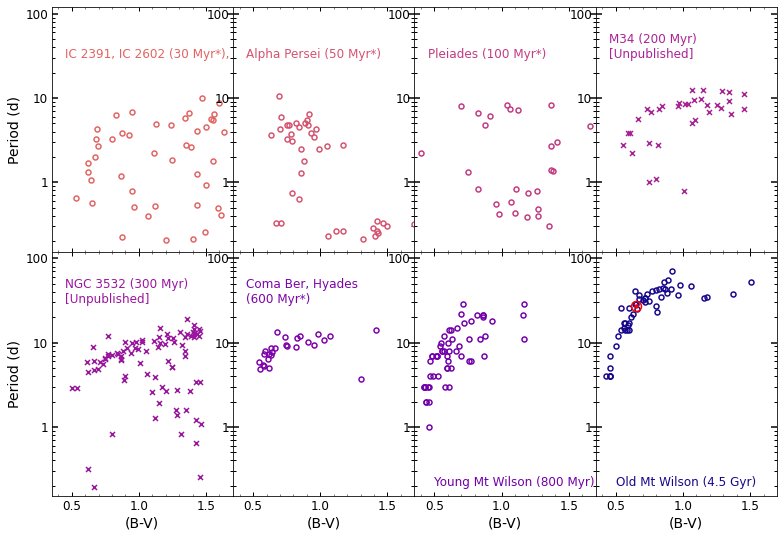

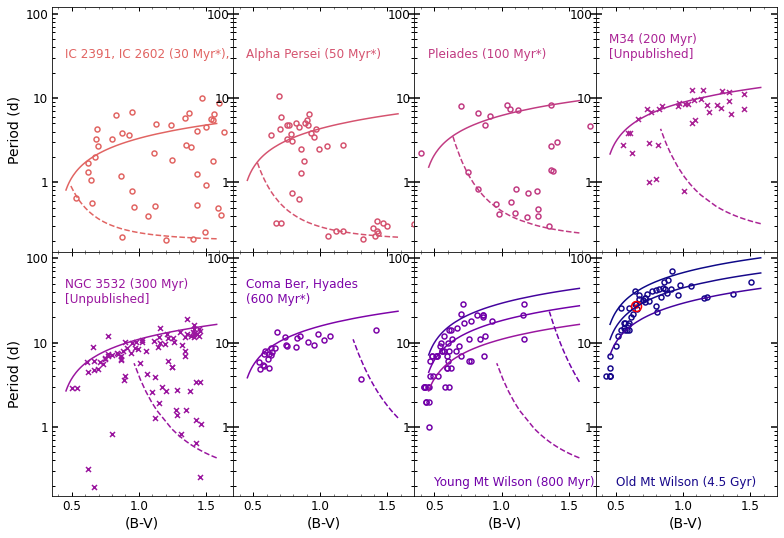

In [31]:
barnes_2003(yscale="log")
plt.savefig("cluster_periods_barnes_log.png",bbox_inches="tight",dpi=300,facecolor="w")
barnes_2003(yscale="log",add_models=True)
plt.savefig("cluster_periods_barnes_log_models.png",bbox_inches="tight",dpi=300,facecolor="w")

[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


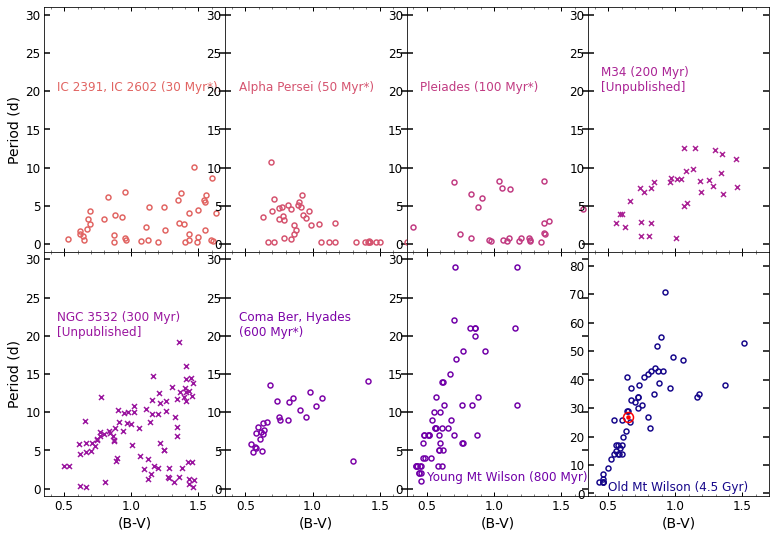

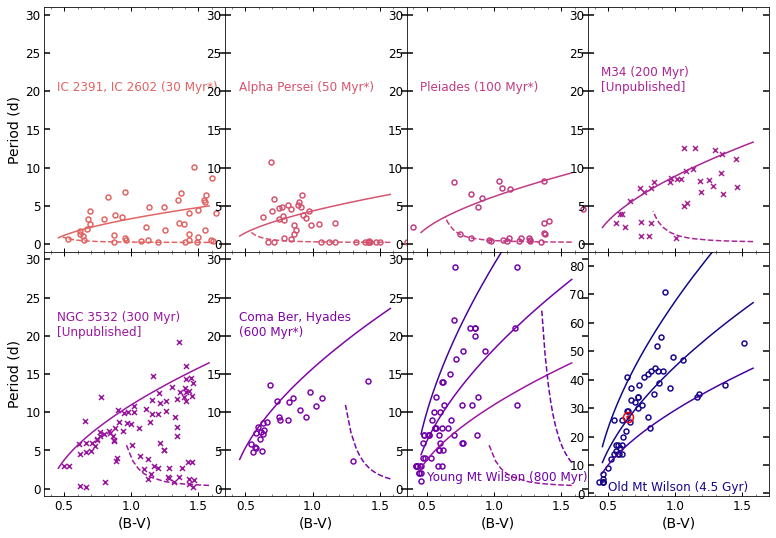

In [32]:
barnes_2003(yscale="linear")
plt.savefig("cluster_periods_barnes_linear.png",bbox_inches="tight",dpi=300,facecolor="w")
barnes_2003(yscale="linear",add_models=True)
plt.savefig("cluster_periods_barnes_linear_models.png",bbox_inches="tight",dpi=300,facecolor="w")